<a href="https://colab.research.google.com/github/mlkbrv/MachineLearningPorjects/blob/main/GradientBoosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/mushrooms.csv")

In [ ]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
X = df.drop("class",axis=1)

In [ ]:
X = pd.get_dummies(X,drop_first=True)

In [ ]:
y = df["class"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=101)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    "n_estimators":[50,100,150],
    "max_depth":[1,3,5],
    "learning_rate":[0.1,0.2,0.05]
}

In [ ]:
gb_model = GradientBoostingClassifier()

In [ ]:
grid = GridSearchCV(gb_model,param_grid=param_grid)

In [ ]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.2, 0.05],
                         'max_depth': [1, 3, 5],
                         'n_estimators': [50, 100, 150]})

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
[3.08450478e-16 4.16370715e-04 1.39622739e-16 4.80100860e-17
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.08326130e-03
 8.12632257e-16 7.27566886e-16 3.25492875e-17 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.38283031e-03
 1.25770486e-02 1.82528985e-02 6.18680207e-02 0.00000000e+00
 4.31669383e-05 5.01363040e-02 0.00000000e+00 6.23351652e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.25635030e-04 9.04584463e-05 9.20461587e-04
 1.48619548e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 8.33597009e-04 5.66370819e-05 0.00000000e+00
 1.83127115e-04 1.07374553e-01 5.42000697e-03 0.00000000e+00
 0.00000000e+00 1.71712839e-05 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000

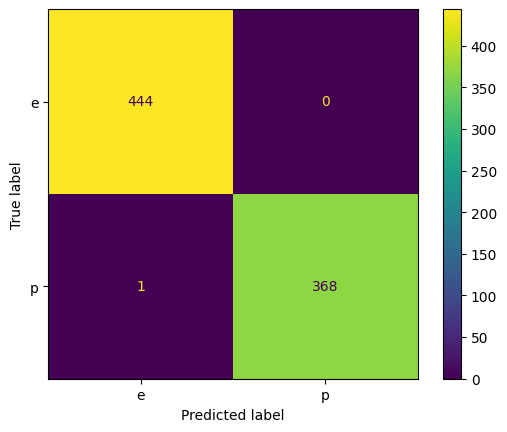

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
preds = grid.predict(X_test)
print(grid.best_params_)
print(grid.best_estimator_.feature_importances_)
print(classification_report(y_test,preds))
ConfusionMatrixDisplay.from_estimator(grid,X_test,y_test)